In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os


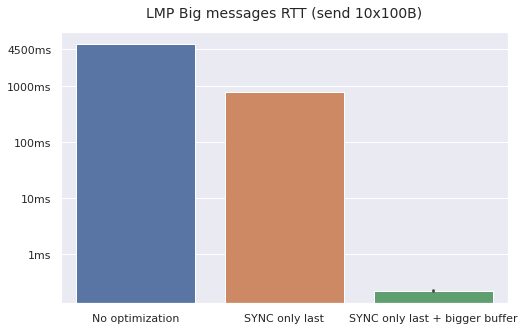

In [36]:
LMP_BENCH_BIG_CSV = './data/lmp_bench_big.csv'

data = pd.read_csv(
            LMP_BENCH_BIG_CSV,
            delimiter=',',
            dtype={"baseline": int, "sync_opt": str, "sync_and_buf_opt": int}
        )
data["time_ms"] = data["time_ns"].map(lambda ns: ns / (1000 * 1000))

sns.set(rc={'figure.figsize':(8,5)})
ax = sns.barplot(data=data, x="experiment", y="time_ms")
ax.set(yscale="log")
plt.ylabel(None)
plt.xlabel(None)
ax.set_title("LMP Big messages RTT (send 10x100B)", y=1.03, fontsize=14)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: '%dms' % y))
ax.set_xticklabels(['No optimization', 'SYNC only last', 'SYNC only last + bigger buffer'])
ax.set_yticks([4500, 1000, 100, 10, 1])
plt.savefig('out/lmp_bench_big.svg', bbox_inches='tight')

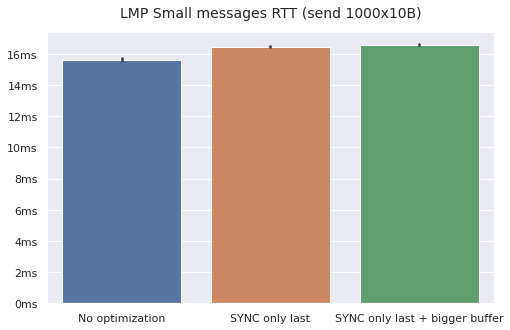

In [35]:
LMP_BENCH_SMALL_CSV = './data/lmp_bench_small.csv'

data = pd.read_csv(
            LMP_BENCH_SMALL_CSV,
            delimiter=',',
            dtype={"baseline": int, "sync_opt": str, "sync_and_buf_opt": int}
        )
data["time_ms"] = data["time_ns"].map(lambda ns: ns / (1000 * 1000))

sns.set(rc={'figure.figsize':(8,5)})
ax = sns.barplot(data=data, x="experiment", y="time_ms")
plt.ylabel(None)
plt.xlabel(None)
ax.set_title("LMP Small messages RTT (send 1000x10B)", y=1.03, fontsize=14)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: '%dms' % y))
# ax.set_yticks([20, 14, 15, 16, 10])
ax.set_xticklabels(['No optimization', 'SYNC only last', 'SYNC only last + bigger buffer'])
plt.savefig('out/lmp_bench_small.svg', bbox_inches='tight')

In [ ]:



def float_format(f):
    if int(f) == f:
        return str(int(f))
    else:
        return f'{f}'

def plot_throughput(filename):
    data = pd.read_csv(
                filename,
                delimiter=',',
            )
    a = data['packet_size'].mul(data['packet_received']).div(data['time']).mul(8e-6).round(2).to_frame('Mbps')
    b = data['packet_received'].div(data['packets_send']).mul(100).to_frame('transmission rate in %')

    data = pd.concat([data, a, b], axis=1)
    print(data)
    ax = sns.barplot(data=data, x="name", y="Mbps", log=True)
    ax.bar_label(ax.containers[0])
    ax.set_title("UDP Throughput", y=1.03, fontsize=14)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: f'{float_format(y)} Mbps'))
    plt.ylabel(None)
    plt.xlabel(None)

In [ ]:
UDP_BENCH_THROUGPUT = "./data/net_bench_udp.csv"
plot_throughput(UDP_BENCH_THROUGPUT)
plt.savefig('out/net_bench_udp_trough.svg', bbox_inches='tight')

In [ ]:
TCP_BENCH_THROUGPUT = "./data/net_bench_tcp.csv"
plot_throughput(TCP_BENCH_THROUGPUT)
plt.savefig('out/net_bench_tcp_trough.svg', bbox_inches='tight')

In [ ]:
udp_echo_no_high_speed_data = [0.1502974033355713, 0.160017728805542, 0.07995319366455078, 0.16000819206237793, 0.0799710750579834, 0.1600179672241211, 0.07997894287109375, 0.15999698638916016, 0.0799858570098877, 0.1600041389465332, 0.07995438575744629, 0.16002345085144043, 0.07999587059020996, 0.16002440452575684, 0.0799417495727539, 0.16001272201538086, 0.07997369766235352, 0.16000652313232422, 0.07997322082519531, 0.16002440452575684, 0.07997012138366699, 0.1600050926208496, 0.07998037338256836, 0.16001605987548828, 0.07997632026672363, 0.16000723838806152, 0.07998085021972656, 0.1599409580230713, 0.07999444007873535, 0.16002249717712402, 0.07997488975524902, 0.16008973121643066, 0.07989716529846191, 0.1600792407989502, 0.07996082305908203, 0.1600344181060791, 0.07997918128967285, 0.15999460220336914, 0.07996964454650879, 0.1600027084350586, 0.07999086380004883, 0.1600041389465332, 0.07991600036621094, 0.16010403633117676, 0.07995247840881348, 0.16002130508422852, 0.07992935180664062, 0.16003894805908203, 0.07999134063720703, 0.16000151634216309, 0.07997727394104004, 0.16000819206237793, 0.07997965812683105, 0.16001391410827637, 0.07997274398803711, 0.16001677513122559, 0.07997298240661621, 0.16001391410827637, 0.07997608184814453, 0.16000103950500488, 0.07998442649841309, 0.16001009941101074, 0.07998251914978027, 0.16000914573669434, 0.07998299598693848, 0.1600029468536377, 0.07998108863830566, 0.16013550758361816, 0.0798494815826416, 0.16000866889953613, 0.0799863338470459, 0.1600041389465332, 0.07996273040771484, 0.16003084182739258, 0.07998061180114746, 0.16000843048095703, 0.07998251914978027, 0.16000080108642578, 0.07998347282409668, 0.16001009941101074, 0.079986572265625, 0.15999794006347656, 0.07998394966125488, 0.16001343727111816, 0.07997655868530273, 0.16000652313232422, 0.07999062538146973, 0.15999960899353027, 0.07998037338256836, 0.16000628471374512, 0.07998228073120117, 0.16000604629516602, 0.07998061180114746, 0.16001009941101074, 0.07998228073120117, 0.16000676155090332, 0.0799858570098877, 0.1600024700164795, 0.07999086380004883, 0.16000008583068848]
udp_echo_high_speed_data = [0.11702156066894531, 0.2399914264678955, 0.23997926712036133, 0.23998641967773438, 0.24002552032470703, 0.23998594284057617, 0.23998379707336426, 0.23998451232910156, 0.240004301071167, 0.2399740219116211, 0.23999500274658203, 0.2399892807006836, 0.24000906944274902, 0.23999333381652832, 0.23998451232910156, 0.23999261856079102, 0.2399907112121582, 0.24001002311706543, 0.31998610496520996, 0.23995065689086914, 0.2400200366973877, 0.24000763893127441, 0.24003171920776367, 0.23996806144714355, 0.24001359939575195, 0.23996496200561523, 0.23999714851379395, 0.2399907112121582, 0.23998022079467773, 0.24001097679138184, 0.23996782302856445, 0.24000835418701172, 0.2400038242340088, 0.23989057540893555, 0.24009370803833008, 0.23995566368103027, 0.24003314971923828, 0.23999643325805664, 0.23998165130615234, 0.2399888038635254, 0.23998045921325684, 0.23999810218811035, 0.23999977111816406, 0.23997902870178223, 0.24000000953674316, 0.24001359939575195, 0.2399740219116211, 0.23990535736083984, 0.23998236656188965, 0.24000024795532227, 0.2399916648864746, 0.2399911880493164, 0.23999476432800293, 0.24005699157714844, 0.23993754386901855, 0.23999452590942383, 0.23997139930725098, 0.24001383781433105, 0.23999857902526855, 0.23999428749084473, 0.24000048637390137, 0.23998379707336426, 0.24006128311157227, 0.2399282455444336, 0.24007201194763184, 0.23996639251708984, 0.2400052547454834, 0.23997974395751953, 0.23998117446899414, 0.24000144004821777, 0.23998737335205078, 0.24000144004821777, 0.239990234375, 0.23999953269958496, 0.2399301528930664, 0.24006915092468262, 0.23998355865478516, 0.24000811576843262, 0.23997092247009277, 0.24001288414001465, 0.2399907112121582, 0.23999285697937012, 0.2399904727935791, 0.23998045921325684, 0.24000096321105957, 0.2399744987487793, 0.24002480506896973, 0.23996973037719727, 0.24001264572143555, 0.2399134635925293, 0.24006986618041992, 0.23998093605041504, 0.24000906944274902, 0.23995542526245117, 0.24003863334655762, 0.23997807502746582, 0.24000811576843262, 0.23997712135314941, 0.23994088172912598, 0.24004244804382324]

tcp_echo_no_high_speed_data = [0.05567145347595215, 0.16005182266235352, 0.07990336418151855, 0.16000747680664062, 0.07996821403503418, 0.16000890731811523, 0.07997989654541016, 0.15994834899902344, 0.08003592491149902, 0.16002678871154785, 0.07997322082519531, 0.15993595123291016, 0.07997298240661621, 0.16009187698364258, 0.08000397682189941, 0.15998601913452148, 0.07997727394104004, 0.160020112991333, 0.07998085021972656, 0.16001129150390625, 0.07991695404052734, 0.16008448600769043, 0.07996821403503418, 0.16000771522521973, 0.07998251914978027, 0.16002607345581055, 0.07996606826782227, 0.16000723838806152, 0.07997822761535645, 0.16002488136291504, 0.07996416091918945, 0.16000914573669434, 0.07998299598693848, 0.16002821922302246, 0.07996010780334473, 0.1600170135498047, 0.07997584342956543, 0.15998268127441406, 0.07998991012573242, 0.16003203392028809, 0.07997941970825195, 0.15993928909301758, 0.08005452156066895, 0.16001033782958984, 0.07998156547546387, 0.16002130508422852, 0.07996296882629395, 0.1600055694580078, 0.0799858570098877, 0.16000819206237793, 0.07988500595092773, 0.1601121425628662, 0.07997846603393555, 0.1600193977355957, 0.07993698120117188, 0.1600351333618164, 0.07997870445251465, 0.16001415252685547, 0.07997632026672363, 0.16002893447875977, 0.07996225357055664, 0.16001486778259277, 0.07997322082519531, 0.15995478630065918, 0.08001136779785156, 0.16000890731811523, 0.07998061180114746, 0.15999913215637207, 0.07999682426452637, 0.16000747680664062, 0.07997727394104004, 0.16000914573669434, 0.07998871803283691, 0.1600055694580078, 0.07997775077819824, 0.15999913215637207, 0.07997846603393555, 0.16003036499023438, 0.07997822761535645, 0.15996575355529785, 0.0800473690032959, 0.1599869728088379, 0.07997894287109375, 0.16000771522521973, 0.07997560501098633, 0.16001653671264648, 0.07997727394104004, 0.16000747680664062, 0.07998895645141602, 0.16002440452575684, 0.07995867729187012, 0.16001224517822266, 0.07997798919677734, 0.16001367568969727, 0.07997751235961914, 0.1600046157836914, 0.0799870491027832, 0.1600031852722168, 0.0799858570098877, 0.16000938415527344]
tcp_echo_high_speed_data = [0.07360172271728516, 0.23995399475097656, 0.23999667167663574, 0.23996233940124512, 0.23997902870178223, 0.24001359939575195, 0.3199732303619385, 0.24000763893127441, 0.2399892807006836, 0.23998284339904785, 0.2400050163269043, 0.23998284339904785, 0.23998284339904785, 0.24001383781433105, 0.23997759819030762, 0.24001002311706543, 0.2399742603302002, 0.24000954627990723, 0.2399888038635254, 0.24000024795532227, 0.2399904727935791, 0.23999905586242676, 0.23998045921325684, 0.24000787734985352, 0.23999404907226562, 0.23999476432800293, 0.2399756908416748, 0.23999285697937012, 0.23997068405151367, 0.24000906944274902, 0.2399895191192627, 0.23993492126464844, 0.24004530906677246, 0.2399289608001709, 0.2400670051574707, 0.23998641967773438, 0.23999881744384766, 0.23998785018920898, 0.2400059700012207, 0.23998141288757324, 0.2400071620941162, 0.23998141288757324, 0.24001026153564453, 0.2399730682373047, 0.2400059700012207, 0.23993754386901855, 0.24001574516296387, 0.2400197982788086, 0.23998355865478516, 0.2400069236755371, 0.23999309539794922, 0.2399904727935791, 0.24000072479248047, 0.23998808860778809, 0.23999738693237305, 0.23998260498046875, 0.2399919033050537, 0.23999500274658203, 0.23998117446899414, 0.2400059700012207, 0.2399883270263672, 0.23994970321655273, 0.24003219604492188, 0.23997950553894043, 0.24001073837280273, 0.23999547958374023, 0.23999595642089844, 0.23998808860778809, 0.23999834060668945, 0.23998641967773438, 0.24000239372253418, 0.23998379707336426, 0.24000167846679688, 0.23997879028320312, 0.23994755744934082, 0.24005651473999023, 0.23999500274658203, 0.24001455307006836, 0.23998808860778809, 0.23999571800231934, 0.23996281623840332, 0.2400357723236084, 0.23996353149414062, 0.2399888038635254, 0.2400200366973877, 0.24000000953674316, 0.23998498916625977, 0.24001479148864746, 0.2399742603302002, 0.23997783660888672, 0.24000787734985352, 0.23993468284606934, 0.24005413055419922, 0.23996496200561523, 0.24001502990722656, 0.2399299144744873, 0.240065336227417, 0.23998594284057617, 0.24000144004821777, 0.23998785018920898]

lats = pd.DataFrame(
    {'UDP': udp_echo_no_high_speed_data,
     'UDP High Speed': udp_echo_high_speed_data,
     'TCP': tcp_echo_no_high_speed_data,
     'TCP High Speed': tcp_echo_high_speed_data,
    })

In [ ]:
ax = sns.violinplot(x="variable", y="value", data=pd.melt(lats))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: f'{int(y*100)}ms'))
plt.ylabel(None)
plt.xlabel(None)
ax.set_title("Echo Round Trip Time", y=1.03, fontsize=14)
plt.savefig('out/net_bench_lat.svg', bbox_inches='tight')

In [ ]:
# Ping mesurements
import statistics
echo_latency_with_term_driver = [0.385 ,28.4 ,0.400 ,0.391 ,0.389 ,44.3 ,2.84 ,0.390 ,0.387 ,0.388 ,28.2 ,0.386 ,0.384 ,0.390 ,44.1 ,2.83 ,0.385 ,0.400 ,0.402 ,27.9 ,0.389 ,0.388 ,0.404 ,43.8 ,1.78 ,0.384 ,0.371 ,0.398 ,27.6 ,0.391 ,0.387 ,0.388 ,43.5 ,1.82 ,0.394 ,0.398 ,0.385 ,27.4 ,0.386 ,0.372 ,0.386 ,43.2 ,1.82 ,0.391 ,0.366 ,0.364 ,23.1 ,0.364 ,0.396 ,0.339 ,43.0 ,1.85 ,0.364 ,0.365 ,0.369 ,26.8 ,0.365 ,0.350 ,0.367 ,42.7 ,0.797 ,0.302 ,0.335 ,58.5 ,17.0 ,0.395 ,0.394 ,0.399 ,42.4 ,0.814 ,0.392 ,0.353 ,58.3 ,16.8 ,0.431 ,0.352 ,0.398 ,42.1 ,1.88 ,0.395 ,0.399 ,0.393 ,26.0 ,0.394 ,0.394 ,0.425 ,37.8 ,0.426 ,0.399 ,0.395 ,57.7 ,15.8 ,0.384 ,0.397 ,0.400 ,41.5 ,0.399 ,0.403 ,0.408 ,57.4 ,15.8 ,0.407 ,0.389 ,0.411 ,41.3 ,0.390 ,0.393 ,0.388 ,57.1 ,15.8 ,0.389 ,0.397 ,0.408 ,41.0 ,0.405 ,0.397 ,0.400 ,56.8 ,14.8 ,0.397 ,0.397 ,0.393 ,40.7 ,0.392 ,0.401 ,0.391 ,56.5 ,14.8 ,0.415 ,0.406 ,0.393 ,40.4 ,0.398 ,0.392 ,0.367 ,56.3 ,14.9 ,0.355 ,0.381 ,0.404 ,40.1 ,0.395 ,0.397 ,0.392 ,56.0 ,14.8 ,0.392 ,0.390 ,0.391 ,39.8 ,0.388 ,0.389 ,0.420 ,55.7 ,13.8 ,0.407 ,0.397 ,0.380 ,39.5 ,0.392 ,0.399 ,0.383 ,55.4 ,13.8 ,0.333 ,0.415 ,0.362 ,39.3 ,0.362 ,0.358 ,0.360 ,55.1 ,13.8 ,0.357 ,0.360 ,0.359 ,38.9 ,0.359 ,0.359 ,0.356 ,54.8 ,12.9 ,0.358 ,0.388 ,0.362 ,38.7 ,0.366 ,0.363 ,0.365 ,54.5 ,12.8 ,0.368 ,0.366 ,0.368 ,34.3 ,0.397 ,0.332 ,0.332 ,54.2 ,12.8 ,0.307 ,0.403 ,0.375 ,38.1 ,0.364 ,0.367 ,0.360 ,54.0 ,12.9 ,0.373 ,0.363 ,0.368 ,37.8 ,0.358 ,0.331 ,0.421 ,53.6 ,11.9 ,0.360 ,0.422 ,0.330 ,37.5 ,0.392 ,0.397 ,0.400 ,53.3 ,13.4 ,0.392 ,0.397 ,0.401 ,37.1 ,0.403 ,0.418 ,0.397 ,53.0 ,11.8 ,0.397 ,0.309 ,0.394 ,36.9 ,0.323] 
echo_latency_no_term_driver = [0.343 ,0.396 ,0.398 ,0.400 ,0.398 ,0.399 ,0.401 ,0.402 ,0.393 ,0.367 ,0.384 ,0.365 ,0.366 ,0.379 ,0.290 ,0.379 ,0.365 ,0.368 ,0.362 ,0.367 ,0.409 ,0.364 ,0.335 ,0.350 ,0.431 ,0.406 ,0.391 ,0.396 ,0.406 ,0.401 ,0.397 ,0.351 ,0.401 ,0.391 ,0.348 ,0.352 ,0.408 ,0.413 ,0.399 ,0.399 ,0.392 ,0.398 ,0.394 ,0.413 ,0.400 ,0.376 ,0.389 ,0.385 ,0.404 ,0.406 ,0.396 ,0.394 ,0.407 ,0.344 ,0.403 ,0.353 ,0.403 ,0.397 ,0.353 ,0.348 ,0.404 ,0.385 ,0.396 ,0.419 ,0.348 ,0.345 ,0.418 ,0.394 ,0.394 ,0.397 ,0.418 ,0.397 ,0.407 ,0.393 ,0.402 ,0.398 ,0.395 ,0.401 ,0.403 ,0.371 ,0.402 ,0.409 ,0.406 ,0.398 ,0.397 ,0.415 ,0.405 ,0.394 ,0.379 ,0.392 ,0.398 ,0.403 ,0.397 ,0.398 ,0.396 ,0.376 ,0.373 ,0.321 ,0.366 ,0.396 ,0.392 ,0.412 ,0.346 ,0.397 ,0.374 ,0.375 ,0.394 ,0.394 ,0.408 ,0.399 ,0.395 ,0.348 ,0.395 ,0.396 ,0.393 ,0.352 ,0.401 ,0.425 ,0.352 ,0.430 ,0.297 ,0.399 ,0.396 ,0.369 ,0.362 ,0.364 ,0.363 ,0.362 ,0.373 ,0.351 ,0.362 ,0.363 ,0.366 ,0.365 ,0.365 ,0.366 ,0.367 ,0.355 ,0.367 ,0.354 ,0.371 ,0.367 ,0.377 ,0.357 ,0.399 ,0.394 ,0.398 ,0.387 ,0.373 ,0.325 ,0.400 ,0.397 ,0.407 ,0.396 ,0.369 ,0.349 ,0.364 ,0.353 ,0.363 ,0.363 ,0.376 ,0.364 ,0.332 ,0.377 ,0.369 ,0.365 ,0.335 ,0.416 ,0.383 ,0.340 ,0.369 ,0.408 ,0.391 ,0.409 ,0.403 ,0.409 ,0.401 ,0.408 ,0.358 ,0.408 ,0.319 ,0.398 ,0.416 ,0.404 ,0.409 ,0.398 ,0.327 ,0.407 ,0.393 ,0.371 ,0.412 ,0.353 ,0.407 ,0.386 ,0.404 ,0.395 ,0.393 ,0.399 ,0.402 ,0.401 ,0.400 ,0.394 ,0.399 ,0.395 ,0.383 ,0.399 ,0.397 ,0.397 ,0.404 ,0.395 ,0.406 ,0.391 ,0.407 ,0.405 ,0.397 ,0.393 ,0.398 ,0.399 ,0.400 ,0.398 ,0.396 ,0.402 ,0.432 ,0.370 ,0.383 ,0.353 ,0.297 ,0.349 ,0.297 ,0.340 ,0.355 ,0.356 ,0.349 ,0.347 ,0.349 ,0.348 ,0.349 ,0.350 ,0.403 ,0.394 ,0.382]

lats = pd.DataFrame(
    {'Ping': echo_latency_with_term_driver,
     'Ping no terminal driver': echo_latency_no_term_driver,
    })
ax = sns.boxplot(x="variable", y="value", data=pd.melt(lats))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: f'{int(y*100)}ms'))
plt.ylabel(None)
plt.xlabel(None)
ax.set_title("Ping Round Trip Time", y=1.03, fontsize=14)
plt.savefig('out/net_bench_ping.svg', bbox_inches='tight')
print(statistics.median(echo_latency_no_term_driver))
print(statistics.median(echo_latency_with_term_driver))

print(statistics.mean(echo_latency_no_term_driver))
print(statistics.mean(echo_latency_with_term_driver))

In [ ]:
TCP_BENCH_THROUGPUT = "./data/lazy_paging.csv"
data = pd.read_csv(
                TCP_BENCH_THROUGPUT,
                delimiter=',',
            )
print(list(data["time"]))
#ax = sns.lineplot(data=data, x="lazy_map_cap_size", y="time")
#ax.set(xscale='log')
#ax.set(yscale='log')

#



fig, ax = plt.subplots(1)
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=10)
ax.plot(data["lazy_map_cap_size"], data["time"], 'o-')
plt.title("Runtime of allocating 128MB with different Lazy Cap sizes")
plt.xlabel("Number of pages of the Cap")
ax.set_xticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: f'{int(y/1000)}s'))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: f'{int(y)}'))
plt.show()
plt.savefig('out/paging_.svg', bbox_inches='tight')

In [22]:
# Paging data
slow = [(964.884000,12743.831000),(665.490000,19689.279000),(690.328000,20264.604000),(690.088000,20313.415000),(711.742000,22039.721000),(697.966000,23497.177000),(725.937000,24557.000000),(739.035000,24765.440000),(729.736000,25868.270000),(742.850000,26554.931000),(736.829000,27808.606000),(752.941000,27401.253000),(757.663000,29232.426000),(764.436000,30746.861000),(753.642000,31266.625000),(787.922000,32141.497000),(778.961000,32227.641000),(797.999000,35055.062000),(803.777000,34352.912000),(785.352000,35460.398000),(813.042000,37836.826000),(824.256000,38401.732000),(831.072000,39438.574000),(820.850000,40772.064000)]
fast = [(9.072000,5.415000),(9.275000,5.436000),(10.285000,5.578000),(9.896000,5.761000),(10.335000,6.087000),(10.744000,6.360000),(11.890000,7.200000),(11.114000,6.838000),(11.565000,7.277000),(11.790000,7.152000),(13.130000,7.827000),(12.434000,7.477000),(12.562000,8.049000),(12.804000,7.916000),(14.022000,8.719000),(13.764000,8.688000),(13.978000,8.622000),(14.995000,9.400000),(14.655000,8.345000),(14.685000,9.433000),(14.922000,9.081000),(15.866000,9.364000),(15.279000,9.737000),(15.733000,10.563000)]

slow_map = list(zip(*slow))[0]
slow_unmap = list(zip(*slow))[1]
fast_map = list(zip(*fast))[0]
fast_unmap = list(zip(*fast))[1]

map_times_slow = pd.DataFrame(
    {'Map': slow_map,
     'Unmap': slow_unmap,
     
    })
map_times_fast = pd.DataFrame(
    {'Map': fast_map,
     'Unmap': fast_unmap,
     
    })


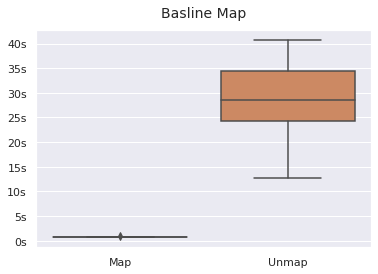

In [33]:
ax = sns.boxplot(x="variable", y="value", data=pd.melt(map_times_slow))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: f'{int(y/1000)}s'))
plt.ylabel(None)
plt.xlabel(None)
ax.set_title("Basline Map", y=1.03, fontsize=14)
plt.savefig('out/paging_map.svg', bbox_inches='tight')

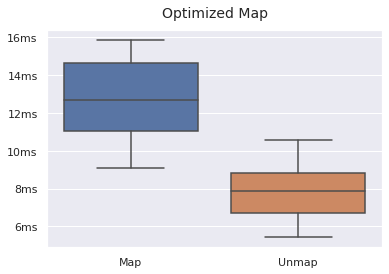

In [34]:
ax = sns.boxplot(x="variable", y="value", data=pd.melt(map_times_fast))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: f'{int(y)}ms'))
plt.ylabel(None)
plt.xlabel(None)
ax.set_title("Optimized Map", y=1.03, fontsize=14)
plt.savefig('out/paging_map_opt.svg', bbox_inches='tight')

# Filesystem

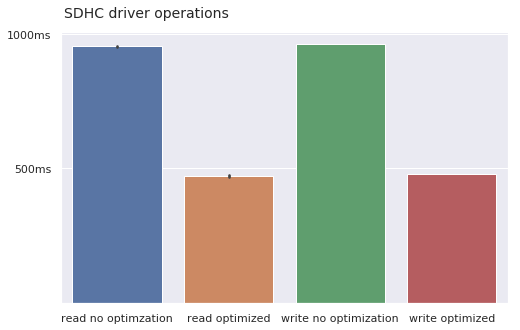

In [6]:
# SDHC driver 'optimization'

sdhc_opt = './data/fs_data/sdhc_optimized.csv'
sdhc_unopt = './data/fs_data/sdhc_unoptimized.csv'


data_opt = pd.read_csv(
            sdhc_opt,
            delimiter=',',
        )

data_unopt = pd.read_csv(
            sdhc_unopt,
            delimiter=',',
        )

data_sd = pd.DataFrame()



data_sd["read_unopt_ms"] = data_unopt["read_ns"].map(lambda ns: ns / (1000 * 1000))
data_sd["read_opt_ms"] = data_opt["read_ns"].map(lambda ns: ns / (1000 * 1000))


data_sd["write_unopt_ms"] = data_unopt["write_ns"].map(lambda ns: ns / (1000 * 1000))
data_sd["write_opt_ms"] = data_opt["write_ns"].map(lambda ns: ns / (1000 * 1000))


print(data_sd.mean())


sns.set(rc={'figure.figsize':(8,5)})
ax = sns.barplot(data=data_sd)
# plt.ylabel(None)

plt.xlabel(None)
ax.set_title("SDHC driver operations", x=0.19, y=1.03, fontsize=14)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: '%dms' % y))
ax.set_xticklabels(['read no optimzation', 'read optimized', 'write no optimization', 'write optimized'])
ax.set_yticks([500, 1000])
plt.savefig('out/fs_sdhc.svg', bbox_inches='tight')

first_read_ns     2144.038829
second_read_ns    1920.049408
dtype: float64


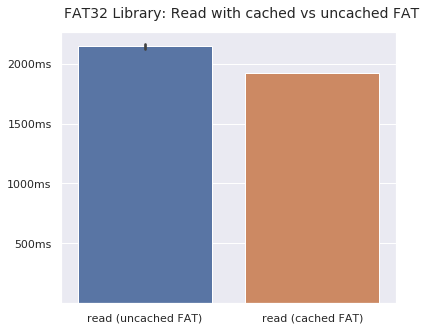

In [8]:
# reading the first cluster of a file (4096 bytes)



data = pd.read_csv(
            './data/fs_data/fat32_lib_read_first_block.csv',
            delimiter=','
        )

colnames = data.columns.tolist()

for col in colnames:
    data[col] = data[col].map(lambda ns: ns / (1000 * 1000))


print(data.mean())

sns.set(rc={'figure.figsize':(6,5)})
ax = sns.barplot(data=data[["first_read_ns", "second_read_ns"]])
# plt.ylabel(None)

plt.xlabel(None)
ax.set_title("FAT32 Library: Read with cached vs uncached FAT", x=0.54, y=1.03, fontsize=14)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: '%dms' % y))
ax.set_xticklabels(['read (uncached FAT)', 'read (cached FAT)'])
ax.set_yticks([2000, 1500, 1000, 500])
plt.savefig('out/fs_read_one_cluster.svg', bbox_inches='tight')

creation_ns                      2.391705
append_ns                        2.888078
find_ns                          0.240011
deletion_ns                     31.680818
reading_large_file_ns_40961B    19.444631
dtype: float64


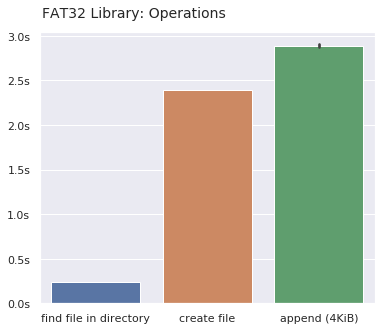

In [9]:
# FAT32 Library operations

data = pd.read_csv(
            './data/fs_data/fat32_lib_operations.csv',
            delimiter=','
        )

colnames = data.columns.tolist()


for col in colnames:
    data[col] = data[col].map(lambda ns: ns / (1000 * 1000  * 1000))

plt.subplots_adjust(hspace = 30)
    
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.barplot(data=data[["find_ns", "creation_ns", "append_ns"]])


print(data.mean())



# plt.ylabel(None)

# plt.xlabel(None)
ax.set_title("FAT32 Library: Operations", x=0.28, y=1.03, fontsize=14)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: '%.1fs' % y))

ax.set_xticklabels(['find file in directory', 'create file', 'append (4KiB)'])

plt.savefig('out/fs_fat32_lib_ops.svg', bbox_inches='tight')

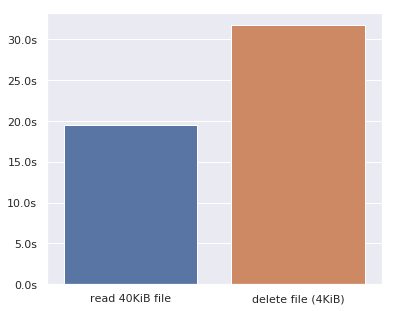

In [10]:
ax = sns.barplot(data=data[["reading_large_file_ns_40961B", "deletion_ns"]])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: '%.1fs' % y))
ax.set_xticklabels(['read 40KiB file', 'delete file (4KiB)'])
plt.savefig('out/fs_fat32_lib_ops_slow.svg', bbox_inches='tight')

open_ns
append_ns
read_ns
close_ns
open_ns      5494.123975
append_ns    8656.162013
read_ns      3840.110825
close_ns        0.050854
dtype: float64


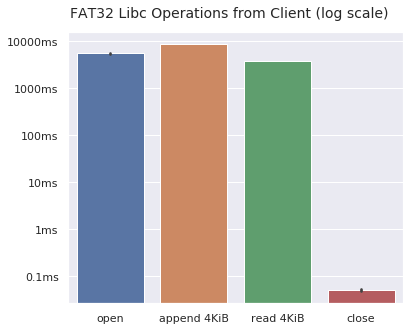

In [11]:
# End to End Filesystem operations

data = pd.read_csv(
            './data/fs_data/fat32_e2e.csv',
            delimiter=','
        )

colnames = data.columns.tolist()


for col in colnames:
    print(col)
    data[col] = data[col].map(lambda ns: ns / (1000  * 1000))
    
print(data.mean())

    
    
plt.subplots_adjust(hspace = 30)
    
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.barplot(data=data)



ax.set_title("FAT32 Libc Operations from Client (log scale)", x=0.48, y=1.03, fontsize=14)


ax.set_xticklabels(['open', 'append 4KiB', 'read 4KiB', 'close'])
ax.set(yscale="log")
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: '%gms' % y))


plt.savefig('out/fs_fat32_e2e.svg', bbox_inches='tight')